# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
df = pd.read_csv("bank.csv")

# Data Pre-preocessing

### 1- Data Understanding

In [3]:
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


- **Drop Un-necessary Columns**

In [4]:
cols_to_drop = ['contact', 'day', 'month', 'duration', 'previous']
df.drop(cols_to_drop, axis=1, inplace=True)

### 2- Check for Datatypes

- **Display Datatypes**

In [5]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,int64,object
Num_Uniqe,76,12,3,4,3805,2,2,36,472,2


- **Change In-correct Datatypes**

In [6]:
cat_cols = ['job', 'marital', 'education', 'housing', 'loan', 'deposit']
df[cat_cols] = df[cat_cols].astype('category')

- **Check dtypes after correction**

In [7]:
pd.DataFrame(df.dtypes).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
0,int64,category,category,category,int64,category,category,int64,int64,category


### 3- Null Values

- **Check for Null Values**

In [8]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4- Handle Outliers

- **Check for Outliers**

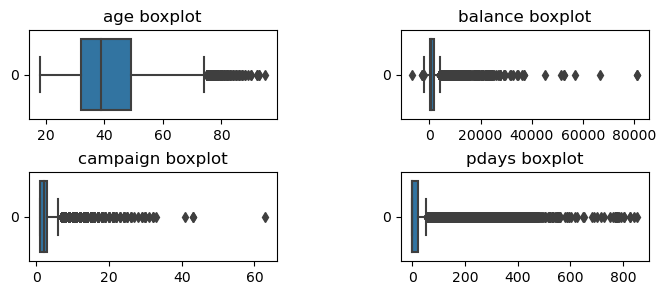

In [9]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 3))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

- **Remove Outliers**

In [10]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Make Sure Outliers are removed**

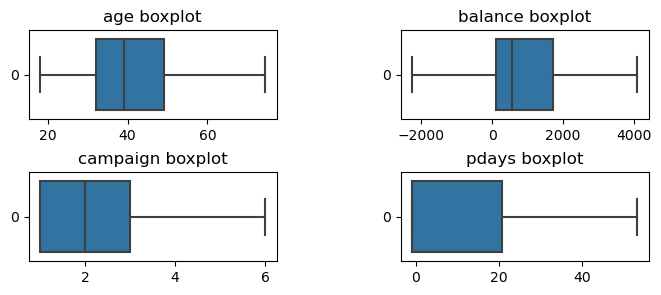

In [11]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 3))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

### 5- Visualization

- **Relationship between the numerical cols & the target**

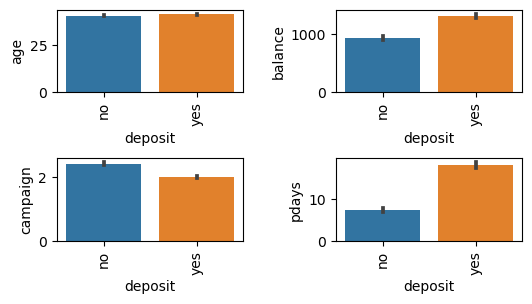

In [12]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(6, 3))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(x="deposit", y=col, data=df)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.8, wspace=.5)
plt.show()

- **Relationship between the categorical cols & the target**

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


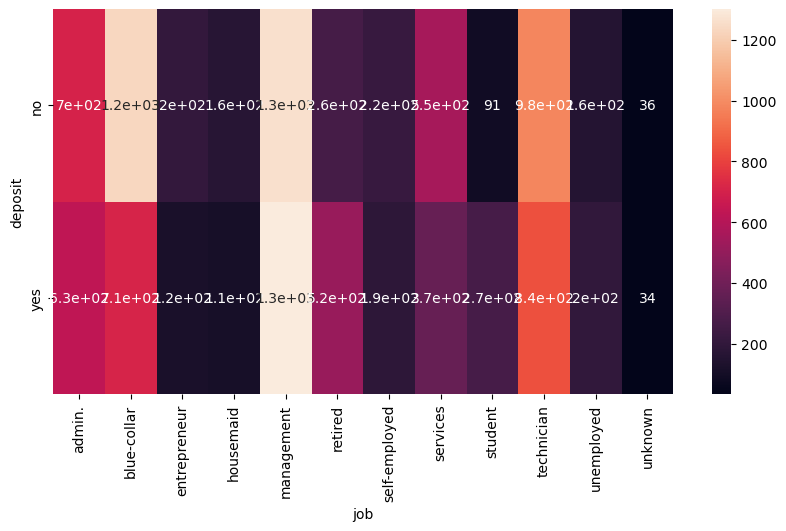

marital,divorced,married,single
deposit,,,
no,671,3596,1606
yes,622,2755,1912


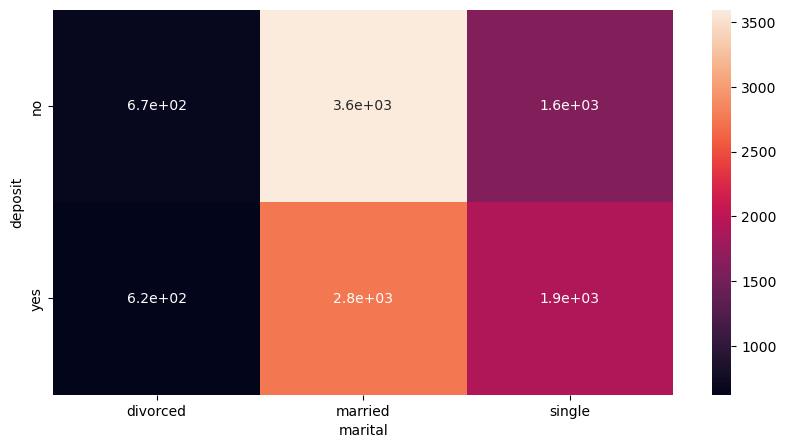

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


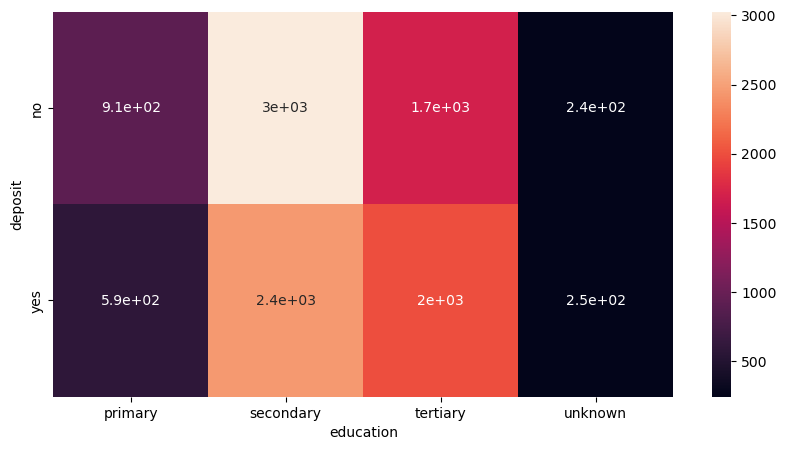

housing,no,yes
deposit,,
no,2527,3346
yes,3354,1935


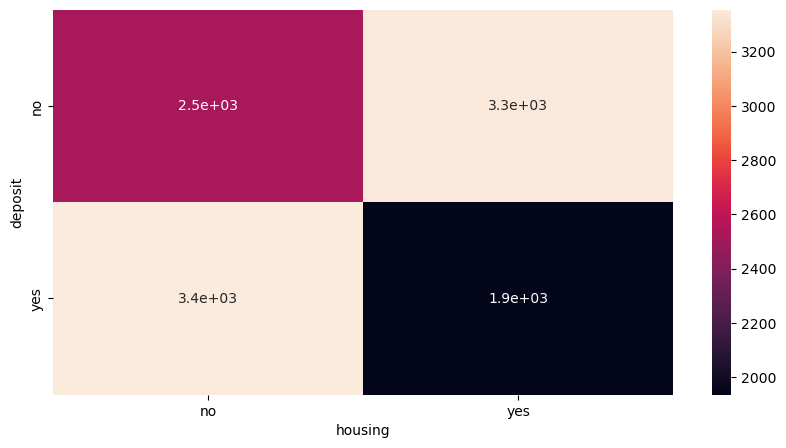

loan,no,yes
deposit,,
no,4897,976
yes,4805,484


<Axes: xlabel='loan', ylabel='deposit'>

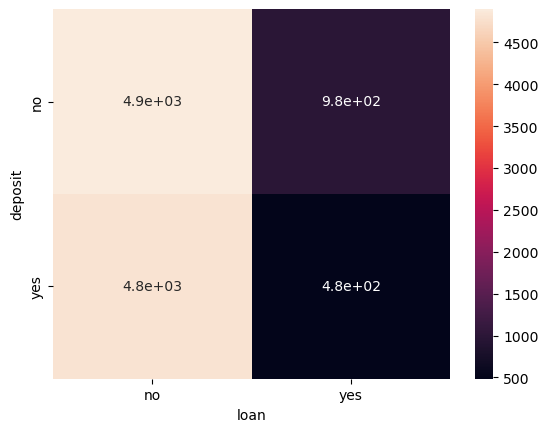

In [13]:
for col in cat_cols[:-2]:
    agg = df.pivot_table(index = "deposit", columns=col, aggfunc=len, values="loan")
    plt.figure(figsize=(10, 5))
    display(agg)
    sns.heatmap(agg, annot=True)
    plt.show()
    print("="*50)

agg = df.pivot_table(index = "deposit", columns="loan", aggfunc=len, values="marital")
display(agg)
sns.heatmap(agg, annot=True)

### 6- Remove Duplicates 

- **Check for Duplicates**

In [14]:
df.duplicated().sum()

194

- **Remove Duplicates**

In [15]:
df.drop_duplicates(inplace=True)

- **Make Sure that Duplicates are Removed**

In [16]:
df.duplicated().sum()

0

### 7- Data Splitting

In [17]:
X = df.drop("deposit", axis=1)
y = df[["deposit"]]

### 8- Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

### 9- Encoding

In [19]:
string_cols = ['job', 'marital', 'education', 'housing', 'loan']
pd.DataFrame(df[string_cols].nunique()).T

,job,marital,education,housing,loan
0,12,3,4,2,2


In [20]:
ordinal_cols = ['education', 'marital', 'housing', 'loan']
binary_cols = ['job']

- **Ordinal Encoding**

In [21]:
labels = {
          'education': {'unknown': 0, 'primary': 1, 'tertiary': 2, 'secondary':3},
          'marital': {'single': 0, 'divorced': 1, 'married': 2},
          'housing': {'no': 0, 'yes': 1},
          'loan': {'no': 0, 'yes': 1}
         }

In [22]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

- **Binary Encoding**

In [23]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

- **Label Encoding**
    - is the same as Ordinal Encoding but special to the target column

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y["deposit"] = label_encoder.fit_transform(y["deposit"])